In [ ]:
!pip install -q pydot

In [ ]:
import graphviz

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
col = ['Class Name', 'Left weight', 'Left distance','Right weight', 'Right distance']
df = pd.read_csv('balance-scale.data', names=col, sep=',')
df.head()

Class Name  Left weight  Left distance  Right weight  Right distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5

In [ ]:
df.info

<bound method DataFrame.info of     Class Name  Left weight  Left distance  Right weight  Right distance
0            B            1              1             1               1
1            R            1              1             1               2
2            R            1              1             1               3
3            R            1              1             1               4
4            R            1              1             1               5
..         ...          ...            ...           ...             ...
620          L            5              5             5               1
621          L            5              5             5               2
622          L            5              5             5               3
623          L            5              5             5               4
624          B            5              5             5               5

[625 rows x 5 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


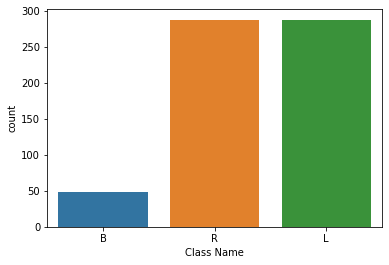

In [ ]:
sns.countplot(df['Class Name'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


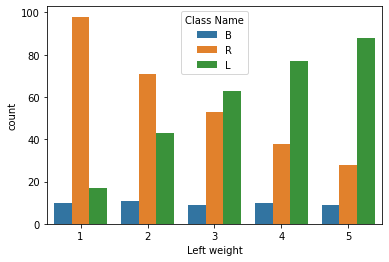

In [ ]:
sns.countplot(df['Left weight'], hue=df['Class Name'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


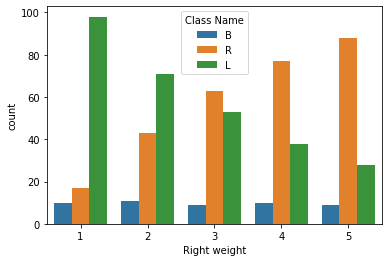

In [ ]:
sns.countplot(df['Right weight'], hue=df['Class Name'])

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Class Name', axis=1)
y=df[['Class Name']]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini",random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_predict = clf_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_predict)

0.7021276595744681

In [ ]:
target = list(df['Class Name'].unique())
feature_names = list(x.columns)

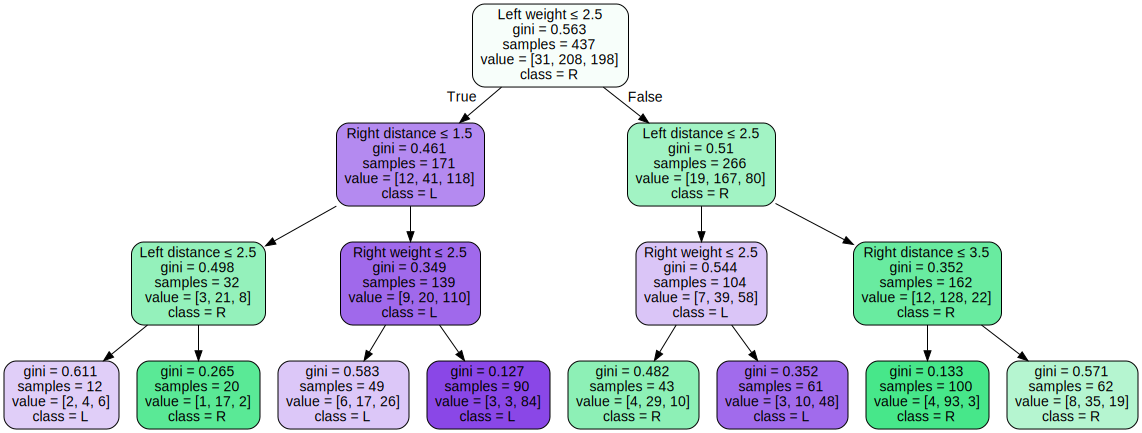

In [ ]:
from sklearn import tree
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names, class_names=target, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph